# Communicate Data Findings

# Data Gathering

In [1]:
# import all packages 
from requests import get
from os import path, getcwd, makedirs, listdir 
from io import BytesIO
from zipfile import ZipFile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as tick
import seaborn as sns
import datetime
import glob
import math
import os
import os.path
import calendar
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Image
from pathlib import Path

In [2]:
# downloading the dataset with pandas
bike_data_folder = 'trip_data_files'


In [3]:
makedirs(bike_data_folder)
pd.read_csv('https://s3.amazonaws.com/fordgobike-data/2017-fordgobike-tripdata.csv').to_csv('{}/2017-forgobike-tripdata.csv'.format(folder_name_of_csvs))
for month in range(1,12):
    month_string = str(month)
    month_leading_zero = month_string.zfill(2)
    
    bike_data_url = 'https://s3.amazonaws.com/fordgobike-data/2018' + month_leading_zero + '-fordgobike-tripdata.csv.zip'
    response = get(bike_data_url)
    
      # code below opens zip file; BytesIO returns a readable and writeable view of the contents;
    unzipped_file = ZipFile(BytesIO(response.content))
        
    # puts extracted zip file into folder trip_data_files
    unzipped_file.extractall(bike_data_folder)


FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'trip_data_files'

In [4]:
# Combine All Locally Saved CSVs into One DataFrame
list_csvs = []
for file_name in listdir(bike_data_folder):
    list_csvs.append(pd.read_csv(bike_data_folder+'/'+file_name))
df = pd.concat(list_csvs)

In [5]:
df.to_csv('data.csv')

In [6]:
# Loading the csv file into dataframe
df = pd.read_csv('data.csv')

# Data Accessing

In [7]:
df.head(5)

,Unnamed: 0,Unnamed: 0.1,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type
0,0,0.0,96,NaN,80110,43.0,37.778768,-122.415929,San Francisco Public Library (Grove St at Hyde...,2018-01-01 15:12:50.2450,1987.0,Male,74.0,37.776435,-122.426244,Laguna St at Hayes St,2017-12-31 16:57:39.6540,Customer
1,1,1.0,88,NaN,78800,96.0,37.766210,-122.426614,Dolores St at 15th St,2018-01-01 13:49:55.6170,1965.0,Female,284.0,37.784872,-122.400876,Yerba Buena Center for the Arts (Howard St at ...,2017-12-31 15:56:34.8420,Customer
2,2,2.0,1094,NaN,45768,245.0,37.870348,-122.267764,Downtown Berkeley BART,2018-01-01 11:28:36.8830,NaN,NaN,245.0,37.870348,-122.267764,Downtown Berkeley BART,2017-12-31 22:45:48.4110,Customer
3,3,3.0,2831,NaN,62172,5.0,37.783899,-122.408445,Powell St BART Station (Market St at 5th St),2018-01-01 10:47:23.5310,NaN,NaN,60.0,37.774520,-122.409449,8th St at Ringold St,2017-12-31 17:31:10.6360,Customer
4,4,4.0,3167,NaN,43603,247.0,37.867789,-122.265896,Fulton St at Bancroft Way,2018-01-01 02:29:57.5710,1997.0,Female,239.0,37.868813,-122.258764,Bancroft Way at Telegraph Ave,2017-12-31 14:23:14.0010,Subscriber


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338864 entries, 0 to 1338863
Data columns (total 18 columns):
Unnamed: 0                 1338864 non-null int64
Unnamed: 0.1               519700 non-null float64
bike_id                    1338864 non-null int64
bike_share_for_all_trip    819164 non-null object
duration_sec               1338864 non-null int64
end_station_id             1336803 non-null float64
end_station_latitude       1338864 non-null float64
end_station_longitude      1338864 non-null float64
end_station_name           1336803 non-null object
end_time                   1338864 non-null object
member_birth_year          1213626 non-null float64
member_gender              1213928 non-null object
start_station_id           1336803 non-null float64
start_station_latitude     1338864 non-null float64
start_station_longitude    1338864 non-null float64
start_station_name         1336803 non-null object
start_time                 1338864 non-null object
user_type        

In [9]:
df.duplicated().sum()

0

In [10]:
df.describe()


,Unnamed: 0,Unnamed: 0.1,bike_id,duration_sec,end_station_id,end_station_latitude,end_station_longitude,member_birth_year,start_station_id,start_station_latitude,start_station_longitude
count,1.338864e+06,519700.000000,1.338864e+06,1.338864e+06,1.336803e+06,1.338864e+06,1.338864e+06,1.213626e+06,1.336803e+06,1.338864e+06,1.338864e+06
mean,1.458563e+05,259849.500000,1.987671e+03,9.647702e+02,1.038589e+02,3.776922e+01,-1.223558e+02,1.981468e+03,1.060832e+02,3.776906e+01,-1.223565e+02
std,1.356365e+05,150024.611786,1.137599e+03,2.945693e+03,9.142859e+01,9.678806e-02,1.557933e-01,1.056388e+01,9.194348e+01,9.689138e-02,1.561779e-01
min,0.000000e+00,0.000000,1.000000e+01,6.100000e+01,3.000000e+00,3.731285e+01,-1.224443e+02,1.886000e+03,3.000000e+00,3.731285e+01,-1.224443e+02
25%,4.781600e+04,129924.750000,1.025000e+03,3.620000e+02,2.700000e+01,3.777331e+01,-1.224107e+02,1.976000e+03,2.800000e+01,3.777241e+01,-1.224117e+02
50%,9.577100e+04,259849.500000,2.043000e+03,5.700000e+02,7.500000e+01,3.778240e+01,-1.223974e+02,1.984000e+03,7.800000e+01,3.778175e+01,-1.223985e+02
75%,1.904752e+05,389774.250000,2.907000e+03,8.950000e+02,1.630000e+02,3.779539e+01,-1.223903e+02,1.989000e+03,1.670000e+02,3.779539e+01,-1.223898e+02
max,5.196990e+05,519699.000000,4.307000e+03,8.636900e+04,3.560000e+02,4.551000e+01,-7.357000e+01,2.000000e+03,3.560000e+02,4.551000e+01,-7.357000e+01


In [11]:
df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338864 entries, 0 to 1338863
Data columns (total 16 columns):
bike_id                    1338864 non-null int64
bike_share_for_all_trip    819164 non-null object
duration_sec               1338864 non-null int64
end_station_id             1336803 non-null float64
end_station_latitude       1338864 non-null float64
end_station_longitude      1338864 non-null float64
end_station_name           1336803 non-null object
end_time                   1338864 non-null object
member_birth_year          1213626 non-null float64
member_gender              1213928 non-null object
start_station_id           1336803 non-null float64
start_station_latitude     1338864 non-null float64
start_station_longitude    1338864 non-null float64
start_station_name         1336803 non-null object
start_time                 1338864 non-null object
user_type                  1338864 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 163.4+ MB


# Cleaning Data

In [13]:
#Making a copy of the dataframe
df_clean = df.copy()

In [14]:
# Changing dates to timestamps
df_clean.start_time = pd.to_datetime(df_clean.start_time)
df_clean.end_time = pd.to_datetime(df_clean.end_time)

In [15]:
# Changing user type, gender and bike_share_for_all_trip to category
df_clean.user_type = df_clean.user_type.astype('category')
df_clean.member_gender = df_clean.member_gender.astype('category')
df_clean.bike_share_for_all_trip = df_clean.bike_share_for_all_trip.astype('category')

In [16]:
# Changing bike id, start_station_id, end_station_id to object
df_clean.bike_id = df_clean.bike_id.astype(str)
df_clean.start_station_id = df_clean.bike_id.astype(str)
df_clean.end_station_id = df_clean.bike_id.astype(str)
df_clean.duration_sec=df_clean.duration_sec.astype(str)

In [17]:
# Calculating the age of the user
df_clean['member_age'] = 2019-df_clean['member_birth_year']

In [18]:
df_clean.member_age.head()

0    32.0
1    54.0
2     NaN
3     NaN
4    22.0
Name: member_age, dtype: float64

In [19]:
# creating new attributes
df_clean['start_time_month_name']=df_clean['start_time'].dt.strftime('%B')
df_clean['end_time_month_name']=df_clean['end_time'].dt.strftime('%B')
df_clean['start_time_month']=df_clean['start_time'].dt.month.astype(int)
df_clean['end_time_month']=df_clean['end_time'].dt.month.astype(int)
df_clean['start_time_weekday']=df_clean['start_time'].dt.strftime('%a')
df_clean['end_time_weekday']=df_clean['end_time'].dt.strftime('%a')
df_clean['start_time_hour']=df_clean['start_time'].dt.hour
df_clean['end_time_hour']=df_clean['end_time'].dt.hour

In [20]:
df_clean.head()

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,...,user_type,member_age,start_time_month_name,end_time_month_name,start_time_month,end_time_month,start_time_weekday,end_time_weekday,start_time_hour,end_time_hour
0,96,NaN,80110,96,37.778768,-122.415929,San Francisco Public Library (Grove St at Hyde...,2018-01-01 15:12:50.245,1987.0,Male,...,Customer,32.0,December,January,12,1,Sun,Mon,16,15
1,88,NaN,78800,88,37.766210,-122.426614,Dolores St at 15th St,2018-01-01 13:49:55.617,1965.0,Female,...,Customer,54.0,December,January,12,1,Sun,Mon,15,13
2,1094,NaN,45768,1094,37.870348,-122.267764,Downtown Berkeley BART,2018-01-01 11:28:36.883,NaN,NaN,...,Customer,NaN,December,January,12,1,Sun,Mon,22,11
3,2831,NaN,62172,2831,37.783899,-122.408445,Powell St BART Station (Market St at 5th St),2018-01-01 10:47:23.531,NaN,NaN,...,Customer,NaN,December,January,12,1,Sun,Mon,17,10
4,3167,NaN,43603,3167,37.867789,-122.265896,Fulton St at Bancroft Way,2018-01-01 02:29:57.571,1997.0,Female,...,Subscriber,22.0,December,January,12,1,Sun,Mon,14,2


Text(0, 0.5, 'number of rides')

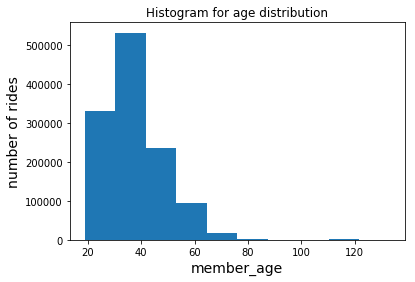

In [21]:
#Histogram for age distribution
plt.hist(data = df_clean, x = 'member_age')
plt.title('Histogram for age distribution')
plt.xlabel('member_age',fontsize = 14)
plt.ylabel('number of rides',fontsize = 14)

In [22]:
df_clean.member_age.mean()

37.53150311545731

The average member's age is 37.5 years that makes the most number of trips

In [23]:
# Deleting the records of users aged above 60
df_clean = df_clean[df_clean['member_age']<=60]

In [24]:
# Changing the data type of age and year
df_clean.member_age = df_clean.member_age.astype(int)
df_clean.member_birth_year = df_clean.member_birth_year.astype(int)

In [25]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1174797 entries, 0 to 1338863
Data columns (total 25 columns):
bike_id                    1174797 non-null object
bike_share_for_all_trip    737975 non-null category
duration_sec               1174797 non-null object
end_station_id             1174797 non-null object
end_station_latitude       1174797 non-null float64
end_station_longitude      1174797 non-null float64
end_station_name           1172849 non-null object
end_time                   1174797 non-null datetime64[ns]
member_birth_year          1174797 non-null int32
member_gender              1174797 non-null category
start_station_id           1174797 non-null object
start_station_latitude     1174797 non-null float64
start_station_longitude    1174797 non-null float64
start_station_name         1172849 non-null object
start_time                 1174797 non-null datetime64[ns]
user_type                  1174797 non-null category
member_age                 1174797 non-null int

### The possible questions that can be framed



1.What are the stations that are frequently visited?

2.Is the trip duration affected by weather( months/seasons)?

3.Does the above depend on if a user is a subscriber or customer?

4.Does the above depend on gender of the user?

# Univariate Exploration

# What are the most visited start and end stations?

In [26]:
df['start_station_name']

0                                      Laguna St at Hayes St
1          Yerba Buena Center for the Arts (Howard St at ...
2                                     Downtown Berkeley BART
3                                       8th St at Ringold St
4                              Bancroft Way at Telegraph Ave
5             San Francisco Caltrain (Townsend St at 4th St)
6                                    Addison St at Fourth St
7          Yerba Buena Center for the Arts (Howard St at ...
8            Mechanics Monument Plaza (Market St at Bush St)
9            Mechanics Monument Plaza (Market St at Bush St)
10         Yerba Buena Center for the Arts (Howard St at ...
11         Yerba Buena Center for the Arts (Howard St at ...
12         San Francisco Caltrain Station 2  (Townsend St...
13         San Francisco Caltrain Station 2  (Townsend St...
14                                     3rd St at Townsend St
15                                     Clay St at Battery St
16                      

In [27]:
def calculate_count(column):
    # Convert column to string and seperate it by '|'
    data = df_clean[column].str.cat(sep = '|')
    
    # Storing the values seperately in a Pandas series
    data = pd.Series(data.split('|'))
    count = data.value_counts(ascending = False)
    
    return count

In [28]:
count = calculate_count('start_station_name')
#printing top 5 values
count.head()


San Francisco Caltrain (Townsend St at 4th St)               26697
San Francisco Caltrain Station 2  (Townsend St at 4th St)    25561
Market St at 10th St                                         25376
San Francisco Ferry Building (Harry Bridges Plaza)           24990
Berry St at 4th St                                           24726
dtype: int64

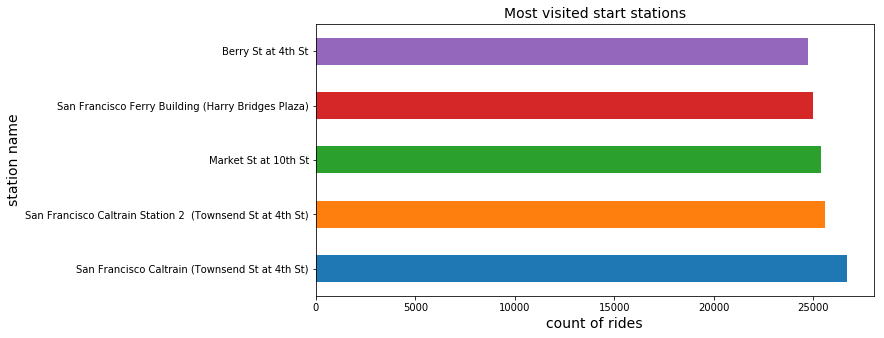

In [29]:
#Plot for most visited start stations
count.head().plot(kind='barh', figsize = (10, 5))
plt.title('Most visited start stations',fontsize = 14)
plt.xlabel('count of rides',fontsize = 14)
plt.ylabel('station name',fontsize = 14);

In [30]:
df['end_station_name']

0          San Francisco Public Library (Grove St at Hyde...
1                                      Dolores St at 15th St
2                                     Downtown Berkeley BART
3               Powell St BART Station (Market St at 5th St)
4                                  Fulton St at Bancroft Way
5             San Francisco Caltrain (Townsend St at 4th St)
6                                    Addison St at Fourth St
7          Yerba Buena Center for the Arts (Howard St at ...
8            Mechanics Monument Plaza (Market St at Bush St)
9            Mechanics Monument Plaza (Market St at Bush St)
10                                     Howard St at Beale St
11                                     Howard St at Beale St
12                                     Spear St at Folsom St
13                                     Spear St at Folsom St
14                             The Embarcadero at Steuart St
15                                   Beale St at Harrison St
16                      

In [31]:
count = calculate_count('end_station_name')
#printing top 5 values
count.head()


San Francisco Caltrain (Townsend St at 4th St)               35693
San Francisco Caltrain Station 2  (Townsend St at 4th St)    32043
San Francisco Ferry Building (Harry Bridges Plaza)           29624
Montgomery St BART Station (Market St at 2nd St)             27794
Berry St at 4th St                                           24191
dtype: int64

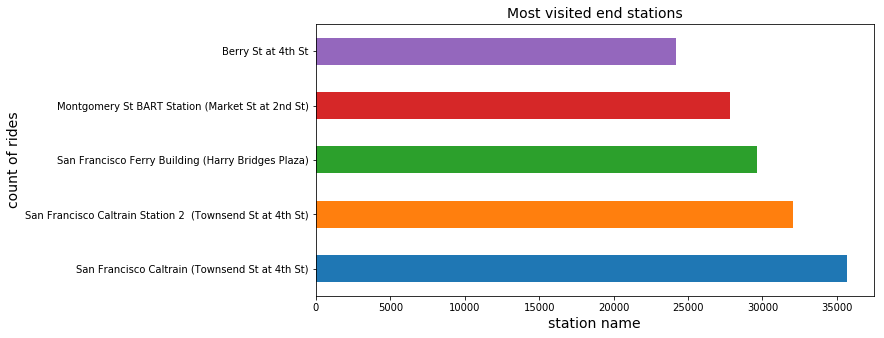

In [32]:
#Plot for most visited end stations.
count.head().plot(kind='barh', figsize = (10, 5))
plt.title('Most visited end stations',fontsize = 14)
plt.ylabel('count of rides',fontsize = 14)
plt.xlabel('station name',fontsize = 14);


As per the above plots,most of the member's source and destination station is San Franciso Caltrain (Townsend St at 4th St) compared to other stations.
Looks like all the top 5 stations are busy but the total number of rides in San Franciso Caltrain (Townsend St at 4th St) is more.

#  How does rides trend change per hour,weekday and month?

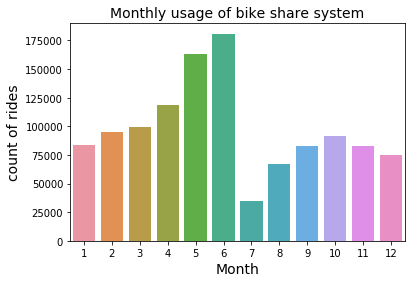

In [33]:
#Plotting monthly usage of bike share system
sns.countplot(x='start_time_month',data=df_clean)
plt.title('Monthly usage of bike share system',fontsize = 14)
plt.ylabel('count of rides',fontsize = 14)
plt.xlabel('Month',fontsize = 14);

As per the plot,the usage of bike share system is highest in the month May and June,during summer holidays.

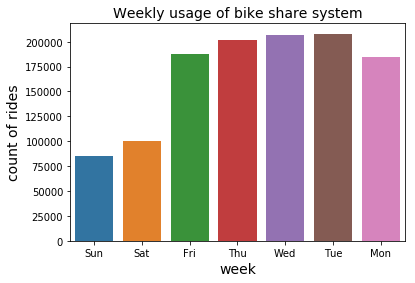

In [34]:
# Plotting weekly usage of bike share system
sns.countplot(data=df_clean,x='start_time_weekday')
plt.title('Weekly usage of bike share system',fontsize = 14)
plt.ylabel('count of rides',fontsize = 14)
plt.xlabel('week',fontsize = 14);

Interestingly ,the Bike share system is used more in weekdays,between tuesday and thursday than in the weekends.Usage of bike share system is least during weekends.

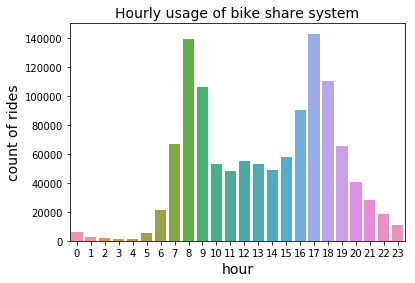

In [35]:
# PLotting hourly usage of the bike sharing system
sns.countplot(data=df_clean, x='start_time_hour')
plt.title('Hourly usage of bike share system',fontsize = 14)
plt.ylabel('count of rides',fontsize = 14)
plt.xlabel('hour',fontsize = 14);
    


The peak hours are observed between 8-9am in the morning and 5-6pm in the evenings.

# Bivariate Exploration

# Does the usage of bike share system depend on user type?

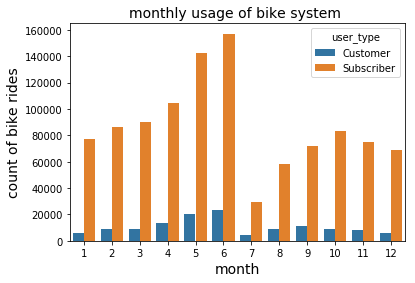

In [36]:
#Bivariate plot for monthly usage of bike share system
sns.countplot(data = df_clean, x = 'start_time_month', hue = 'user_type')
plt.title('monthly usage of bike system ',fontsize = 14)
plt.xlabel('month',fontsize = 14)
plt.ylabel('count of bike rides',fontsize = 14);


For Customers, the bike renting is high in demand around summertime, reaching its peak in June. For Subscribers, the highest demand is in May and June , reaching it's peak in June. 

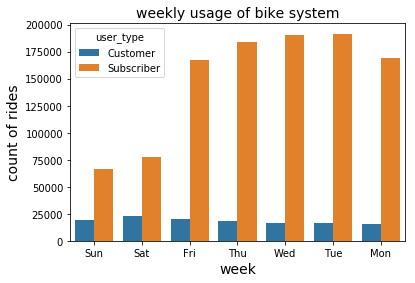

In [37]:
#Bivariate plot for weekly usage of bike share system
sns.countplot(data=df_clean, x='start_time_weekday', hue="user_type")
plt.title('weekly usage of bike system',fontsize = 14)
plt.xlabel('week',fontsize = 14)
plt.ylabel('count of rides',fontsize = 14);

The trend of customers is reverse to that of the subscribers.Customers use the bike share system mostly during weekends and subscribers use it during weekdays. 


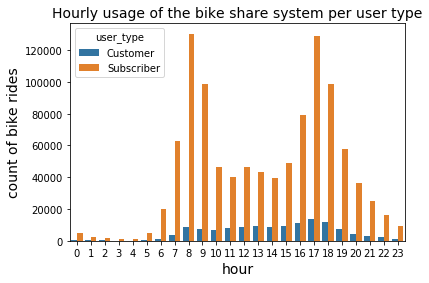

In [38]:
#Bivariate plot for hourly usage of bike share system
sns.countplot(data=df_clean, x='start_time_hour', hue="user_type")
plt.title('Hourly usage of the bike share system per user type', fontsize = 14)
plt.xlabel('hour', fontsize = 14)
plt.ylabel('count of bike rides', fontsize = 14);

Customers use bikes mainly between 8 am - 7 pm, reaching the renting peak around 5pm. Subscribers on the other side use the system at around 8-9am and 5-6pm.

# Multivariate Exploration

In [39]:
# Changing the datatype of variables
df_clean['start_time_month']=df_clean['start_time'].dt.month.astype(str)
df_clean['end_time_month']=df_clean['end_time'].dt.month.astype(str)
df_clean.duration_sec=df_clean.duration_sec.astype(int)
df_clean.user_type=df_clean.user_type.astype(str)
df_clean.bike_id=df_clean.bike_id.astype(int)




# Does usage of bike share system depend on gender?

Text(0.5, 1.0, 'Monthly usage of bike system')

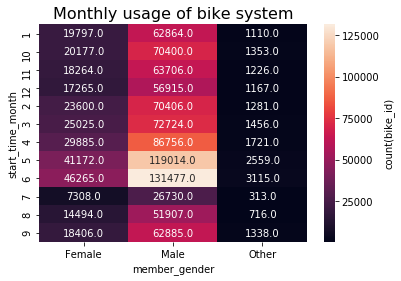

In [58]:
#Multivariate plot for montly usage of bike share system
df1 = df_clean.groupby(['member_gender', 'start_time_month']).count()['bike_id']
df1 = df1.reset_index(name = 'count_bike_id')
df1 = df1.pivot(index = 'start_time_month', columns = 'member_gender',
                            values = 'count_bike_id')
sns.heatmap(df1, annot = True, fmt = '.1f',
           cbar_kws = {'label' : 'count(bike_id)'})
plt.title('Monthly usage of bike system',fontsize=16)

Usage of bike is highest in June for all the genders and highest usage is by Male followed by Female and Other.



Text(0.5, 1.0, 'Weekly usage of bike system')

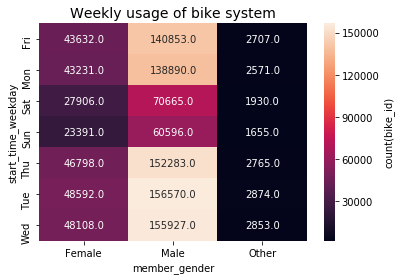

In [59]:
#Multivariate plot for weekly usage of bike share system
df1 = df_clean.groupby(['member_gender', 'start_time_weekday']).count()['bike_id']
df1 = df1.reset_index(name = 'count_bike_id')
df1 = df1.pivot(index = 'start_time_weekday', columns = 'member_gender',
                            values = 'count_bike_id')
sns.heatmap(df1, annot = True, fmt = '.1f',
           cbar_kws = {'label' : 'count(bike_id)'})
plt.title('Weekly usage of bike system',fontsize=14)

For all the three genders,usage is least during weekends.During usage is observed on Tuesday and wednesday.

Text(0.5, 1.0, 'Hourly usage of bike system')

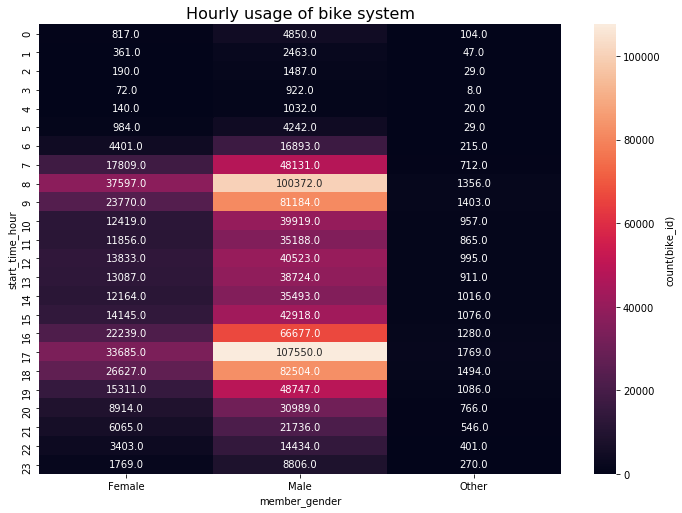

In [61]:
#Multivariate plot for hourly usage of bike share system
df1 = df_clean.groupby(['member_gender', 'start_time_hour']).count()['bike_id']
df1 = df1.reset_index(name = 'count_bike_id')
df1 = df1.pivot(index = 'start_time_hour', columns = 'member_gender',
                            values = 'count_bike_id')
plt.figure(figsize=[11.69,8.27])
sns.heatmap(df1, annot = True, fmt = '.1f',
           cbar_kws = {'label' : 'count(bike_id)'})
plt.title('Hourly usage of bike system',fontsize=16)

At 8am-9am and 5pm-6pm the highest usage is seen by all the genders.Least usage is observed during 12am-5am.


Text(0.5, 1.0, 'monthly usage of bike system')

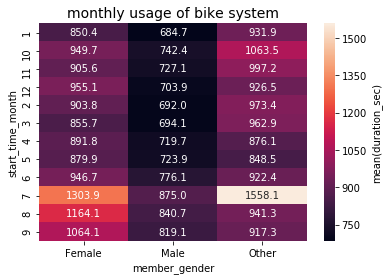

In [53]:
#Multivariate plot for montly usage of bike share system
df1 = df_clean.groupby(['member_gender', 'start_time_month']).mean()['duration_sec']
df1 = df1.reset_index(name = 'duration_sec_avg')
df1 = df1.pivot(index = 'start_time_month', columns = 'member_gender',
                            values = 'duration_sec_avg')
sns.heatmap(df1, annot = True, fmt = '.1f',
           cbar_kws = {'label' : 'mean(duration_sec)'})
plt.title('Monthly usage of bike system',fontsize=16)



The highest time on bikes is spent in July by Others,followed by Female.Men spend comparatively less time than the other two genders.

Text(0.5, 1.0, 'weekly usage of bike system')

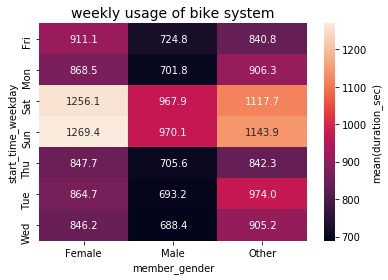

In [54]:
#Multivariate plot for weekly usage of bike share system
df1 = df_clean.groupby(['member_gender', 'start_time_weekday']).mean()['duration_sec']
df1 = df1.reset_index(name = 'duration_sec_avg')
df1 = df1.pivot(index = 'start_time_weekday', columns = 'member_gender',
                            values = 'duration_sec_avg')
sns.heatmap(df1, annot = True, fmt = '.1f',
           cbar_kws = {'label' : 'mean(duration_sec)'})
plt.title('Weekly usage of bike system',fontsize=16)

All the three genders spend more time on bikes during weekends.

Text(0.5, 1.0, 'weekly usage of bike system')

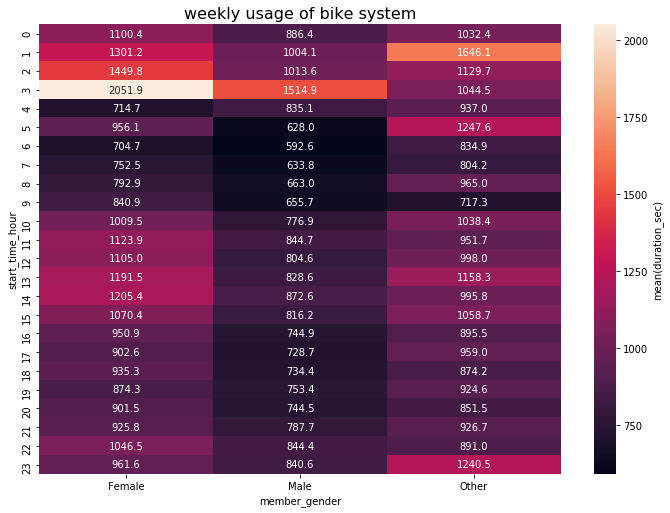

In [56]:
#Multivariate plot for hourly usage of bike share system
df1 = df_clean.groupby(['member_gender', 'start_time_hour']).mean()['duration_sec']
df1 = df1.reset_index(name = 'duration_sec_avg')
df1 = df1.pivot(index = 'start_time_hour', columns = 'member_gender',
                            values = 'duration_sec_avg')
plt.figure(figsize=[11.69,8.27])
sns.heatmap(df1, annot = True, fmt = '.1f',
           cbar_kws = {'label' : 'mean(duration_sec)'})
plt.title('Weekly usage of bike system',fontsize=16)

Mean time spent by male is female and male is highest at 3am and  for other it is at 2am.

# Key Insights

The variables  'bike_count' and 'duration_sec' are inversely proportional to each other.

In all the three kind of plots(hourly,weekly and monthly):

   1.the number of bikes used by men is more but average duration time spent by them is less.
    
   2.the number of bikes used by others is less but average duration time spent by them is more.
    
   3.the number of bikes used on weekends is less but average duration time spent by them is more.
    

## CONCLUSION

In this analysis by plotting Bike type behaviour throughout that day,weekend and month,I conclude the following:

The average age of the users is around 37.

Customers use bikes mainly between 8 am - 7 pm,may be during office hours.Whereas,Subscribers on the other side use the system at around 8am-9am and 5pm-6pm.

Customers use bikes mostly during weekends while subscribers use them during the weekdays.

Generally,in both customers and subscribers there are more male users as compared to female users using the bike share system.

## REFERENCES

1.https://stackoverflow.com/questions/8024248/telling-python-to-save-a-txt-file-to-a-certain-directory-on-windows-and-mac

2.https://timestamp.online/article/how-to-convert-timestamp-to-datetime-in-python

3.https://classroom.udacity.com/nanodegrees/nd002/parts/9f7e8991-8bfb-4103-8307-3b6f93f0ecc7/modules/1dc09d28-5703-493c-aab5-a418b8bfa3e1/lessons/b86503df-e416-4f0e-9e2d-a7a3c08d0bc3/concepts/67ba40a3-42b6-4216-a100-19c5e565dfbe

4.https://classroom.udacity.com/nanodegrees/nd002/parts/9f7e8991-8bfb-4103-8307-3b6f93f0ecc7/modules/1dc09d28-5703-493c-aab5-a418b8bfa3e1/lessons/22ff3b91-42f7-420e-b6ad-de0b29684ed0/concepts/7c2f7055-36bc-4370-b81e-68a897951353

5.https://classroom.udacity.com/nanodegrees/nd002/parts/9f7e8991-8bfb-4103-8307-3b6f93f0ecc7/modules/1dc09d28-5703-493c-aab5-a418b8bfa3e1/lessons/6ab50b2b-0a93-489b-a142-3b84a151e9d9/concepts/c8f7618a-637d-427a-b8df-83a0bc45a4cf